In [132]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [133]:
df = pd.read_csv("day.csv")
df['new_column'] = 0
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,new_column
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0


In [134]:
df.drop(['new_column'], axis=1, inplace=True)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


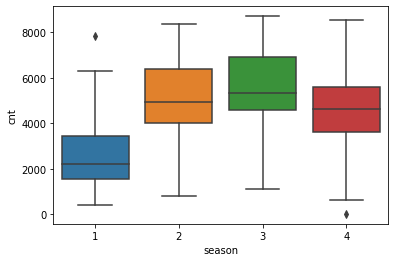

In [135]:
sns.boxplot(df["season"], df["cnt"])

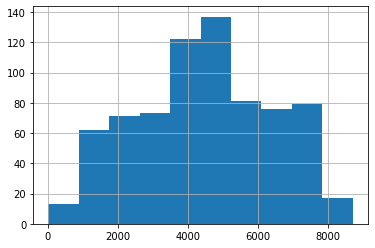

In [136]:
df["cnt"].hist()

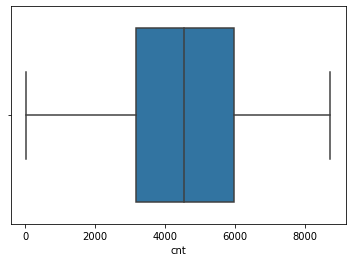

In [137]:
sns.boxplot(df["cnt"])

In [138]:
df["season"].value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

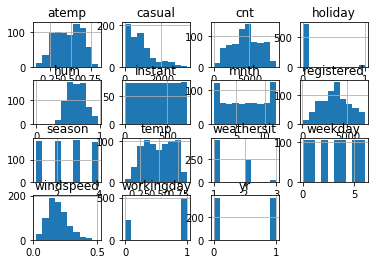

In [139]:
df.hist();

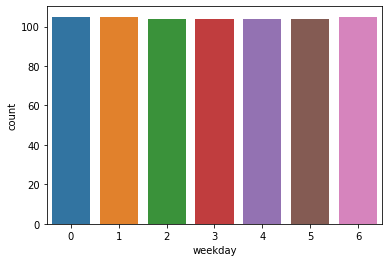

In [140]:
sns.countplot(df["weekday"])

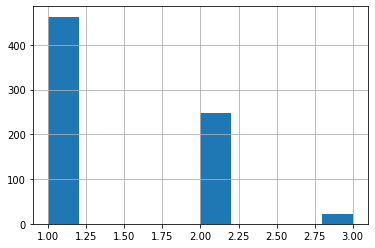

In [141]:
df["weathersit"].hist()

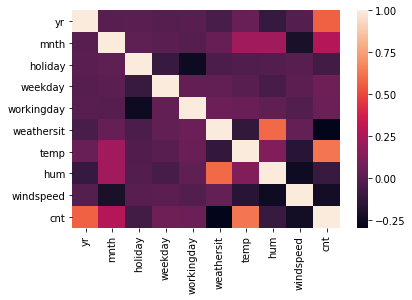

In [142]:
df.drop(["atemp", "instant", "dteday", "casual", "registered", "season"], axis=1, inplace=True)
sns.heatmap(df.corr())

In [143]:
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [144]:
df.groupby("weekday")["cnt"].sum()

weekday
0    444027
1    455503
2    469109
3    473048
4    485395
5    487790
6    477807
Name: cnt, dtype: int64

In [145]:
X, y = df.drop("cnt", axis=1), df["cnt"]
X.shape

(731, 9)

In [146]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

In [147]:
ols = LinearRegression(normalize=True)

In [148]:
train_part_len = int(0.7 * df.shape[0])
X_train = X.values[:train_part_len, :]
X_valid = X.values[train_part_len:, :]
y_train = y.values[:train_part_len]
y_valid = y.values[train_part_len:]

In [149]:
from sklearn.metrics import mean_squared_error

In [150]:
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [151]:
y_ols_pred = ols.predict(X_valid)

In [162]:
def rmse(y, p):
    return np.sqrt(mean_squared_error(y, p))

In [153]:
def beautiful_coef(coefs, feature_names=X.columns):
    return pd.DataFrame(coefs, index=feature_names, columns = ["coef"]).sort_values("coef", ascending=False)

In [163]:
rmse(y_valid, y_ols_pred)

1209.2865957788924

In [155]:
ols.coef_

array([ 2112.39378502,   106.04018656,  -499.38358823,    48.36211164,
          31.41483932,  -511.38289839,  5585.42445506, -1019.28261786,
       -2768.86343667])

In [156]:
beautiful_coef(ols.coef_, feature_names=X.columns)

,coef
temp,5585.424455
yr,2112.393785
mnth,106.040187
weekday,48.362112
workingday,31.414839
holiday,-499.383588
weathersit,-511.382898
hum,-1019.282618
windspeed,-2768.863437


In [158]:
ridge = Ridge(random_state=17, normalize=True)
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=17, solver='auto', tol=0.001)

In [159]:
beautiful_coef(ridge.coef_)

,coef
temp,2741.583105
yr,846.117430
workingday,56.926144
mnth,40.482905
weekday,23.023544
holiday,-283.612203
weathersit,-349.618305
hum,-422.926991
windspeed,-1655.646214


In [172]:
ridge_valid_pred = ridge.predict(X_valid)
rmse(y_valid, ridge_valid_pred)

1866.002275707494

In [173]:
alphas = np.logspace(-4, 4, 100)
ridge_cv = RidgeCV(alphas = alphas, cv = 10, normalize=True).fit(X_train, y_train)
ridge_cv.alpha_

M:\Anaconda3\envs\tfp\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.018307382802953697

In [174]:
best_ridge_valid_pred = ridge_cv.predict(X_valid)
rmse(y_valid, best_ridge_valid_pred)

1205.6253003254517

In [175]:
lasso_cv = LassoCV(alphas = alphas, cv = 10, normalize=True).fit(X_train, y_train)
lasso_cv.alpha_

0.06734150657750829

In [176]:
best_lasso_valid_pred = lasso_cv.predict(X_valid)
rmse(y_valid, best_lasso_valid_pred)

1209.0774375518988

In [177]:
beautiful_coef(ridge_cv.coef_)

,coef
temp,5480.665148
yr,2055.677946
mnth,102.403693
weekday,47.543478
workingday,34.174091
holiday,-491.078501
weathersit,-511.854646
hum,-980.328017
windspeed,-2734.743216


In [178]:
beautiful_coef(lasso_cv.coef_)

,coef
temp,5578.968732
yr,2106.343875
mnth,105.270854
weekday,47.718829
workingday,28.895980
holiday,-492.280253
weathersit,-511.205484
hum,-1003.387351
windspeed,-2747.738650
